<a href="https://colab.research.google.com/github/eduardogil11/IA-Modulo-1-Estadistica/blob/main/Business_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business case: Understanding profitability in the US financial market

## Eduardo Rodríguez Gil - A01274913

This is business case prepared for the Statistics Module (Bloque 1) of the Advanced AI concentration

## 1 Case Description

You were hired as a data scientist in an important mutual fund firm in the department of financial analysis. The firm has been doing financial analysis and financial forecast for several years. You were hired to come up with alternative approaches to do descriptive analytics in order to find better future alternatives for forecasting methods.

You have to analyze historical quarterly financial statements of all US public firms listed in the New York Exchange and NASDAQ. You will receive this dataset in a .csv format.

You have to carefully read the data dictionary to understand each variable and the dataset to understand its structure.

## 2 Business Questions

All your data and statistical analysis has to be tailored to respond the following questions:

In [2]:
# Importamos las librerias que vamos a utilizar.
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# Importamos los datos del dataframe del .csv
df_us2022 = pd.read_csv('us2022q2a.csv') # US 2022 data frame
df_firms = pd.read_csv('usfirms2022.csv') # US firms 2022 data frame

In [5]:
df_us2022

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.761670,104.0000,452000.000,NaN,2000.0,1.0
1,A,2000q2,2485000.0,1261000.0,1010000.0,0.0,42000.0,0.0,90000.0,7321000.0,2679000.0,512000.0,0.0,4642000.0,45.215607,73.7500,452271.967,6.0,2000.0,2.0
2,A,2000q3,2670000.0,1369000.0,1091000.0,0.0,28000.0,0.0,83000.0,7827000.0,2925000.0,528000.0,0.0,4902000.0,30.003238,48.9375,453014.579,9.0,2000.0,3.0
3,A,2000q4,3372000.0,1732000.0,1182000.0,0.0,10000.0,0.0,163000.0,8425000.0,3160000.0,830000.0,0.0,5265000.0,33.566841,54.7500,456366.381,12.0,2000.0,4.0
4,A,2001q1,2841000.0,1449000.0,1113000.0,0.0,-6000.0,0.0,119000.0,9208000.0,3667000.0,556000.0,0.0,5541000.0,18.840347,30.7300,456769.737,3.0,2001.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82114,DCO,2000q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,2.0
82115,DCO,2000q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,3.0
82116,DCO,2000q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,4.0
82117,DCO,2001q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001.0,1.0


In [6]:
df_firms

,Ticker,Name,N,Class,Country\nof Origin,Type of Asset,Sector NAICS\nlevel 1,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind
0,FLWS,1 800 Flowers Com Inc,1,Com A,US,Stock,Retail Trade,NASDAQ,Trade,Retail Trade,-
1,TXG,"10x Genomics, Inc",2,Com A,US,Stock,Manufacturing,NASDAQ,Electric Electron,"Navigational, Measuring, Electromedical, and C...",-
2,GOED,1847 Goedeker Inc,3,Com,US,Stock,Retail Trade,AMEX,Trade,Furniture and Home Furnishings Stores,-
3,ONEM,"1life Healthcare, Inc",4,Com,US,Stock,Health Care and Social Assistance,NASDAQ,Other,Offices of Physicians,-
4,SRCE,1st Source Corp,5,Com,US,Stock,Finance and Insurance,NASDAQ,Finance and Insurance,Depository Credit Intermediation,-
...,...,...,...,...,...,...,...,...,...,...,...
3603,ZUO,"Zuora, Inc",3604,Com A,US,Stock,Information,NYSE,Software & Data,Software Publishers,-
3604,ZWS,Zurn Elkay Water Solutions Corp,3605,Com,US,Stock,Manufacturing,NYSE,Industrial Machin,Other General Purpose Machinery Manufacturing,-
3605,ZY,Zymergen Inc,3606,Com,US,Stock,"Professional, Scientific, and Technical Services",NASDAQ,Other,Scientific Research and Development Services,-
3606,ZYNE,"Zynerba Pharmaceuticals, Inc",3607,Com,US,Stock,Manufacturing,NASDAQ,Chemical,Pharmaceutical and Medicine Manufacturing,-


In [7]:
# Unimos la dos tablas para convertirlo en un solo dataframe
us2022_merged = df_us2022.merge(df_firms, left_on='firm', right_on='Ticker')

In [8]:
us2022_merged

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,Name,N,Class,Country\nof Origin,Type of Asset,Sector NAICS\nlevel 1,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Agilent Technologies, Inc",94,Com,US,Stock,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
1,A,2000q2,2485000.0,1261000.0,1010000.0,0.0,42000.0,0.0,90000.0,7321000.0,...,"Agilent Technologies, Inc",94,Com,US,Stock,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
2,A,2000q3,2670000.0,1369000.0,1091000.0,0.0,28000.0,0.0,83000.0,7827000.0,...,"Agilent Technologies, Inc",94,Com,US,Stock,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
3,A,2000q4,3372000.0,1732000.0,1182000.0,0.0,10000.0,0.0,163000.0,8425000.0,...,"Agilent Technologies, Inc",94,Com,US,Stock,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
4,A,2001q1,2841000.0,1449000.0,1113000.0,0.0,-6000.0,0.0,119000.0,9208000.0,...,"Agilent Technologies, Inc",94,Com,US,Stock,Manufacturing,NYSE,Electric Electron,"Navigational, Measuring, Electromedical, and C...",0.124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81754,DCO,2000q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ducommun Inc,1041,Com,US,Stock,Manufacturing,NYSE,Vehicle & Parts,Aerospace Product and Parts Manufacturing,-
81755,DCO,2000q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ducommun Inc,1041,Com,US,Stock,Manufacturing,NYSE,Vehicle & Parts,Aerospace Product and Parts Manufacturing,-
81756,DCO,2000q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ducommun Inc,1041,Com,US,Stock,Manufacturing,NYSE,Vehicle & Parts,Aerospace Product and Parts Manufacturing,-
81757,DCO,2001q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ducommun Inc,1041,Com,US,Stock,Manufacturing,NYSE,Vehicle & Parts,Aerospace Product and Parts Manufacturing,-


## 2.1 General questions:

By industry, what is the composition of US public firms in terms of firm size, sales performance and profitability?

Why some firms are more profitable than others? Which factors/variables from financial statements are related to stock returns?

## 2.2.1 About descriptive statistics:

### 2.2.1.1 Considering the most recent financial quarter of the dataset:

In [15]:
# Obtenemos el financial quarter del dataset
us2022_quarter = us2022_merged[us2022_merged['q'] == '2022q2']

* Show how many firms by industry there are in the sample

In [10]:
# Aqui se muestra el número de industrias que hay en el actualmente en el dataframe
df_firms['Sector NAICS\nlevel 1'].value_counts()

Manufacturing                                                               1567
Finance and Insurance                                                        703
Information                                                                  263
Retail Trade                                                                 152
Professional, Scientific, and Technical Services                             145
Administrative and Support and Waste Management and Remediation Services     133
Mining, Quarrying, and Oil and Gas Extraction                                104
Wholesale Trade                                                               79
Utilities                                                                     77
Transportation and Warehousing                                                69
Accommodation and Food Services                                               69
Real Estate and Rental and Leasing                                            68
Health Care and Social Assis

* For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed?

Para poder realizar esto ocupamos las formulas que nos proporciono para poder hacer las Variable calculations.

In [11]:
# Obtenemos los Firm Size measures de Book value
us2022_merged['Book value'] = us2022_merged['totalassets'] - us2022_merged['totalliabilities']


# Obtenemos los Firm Size measures de Market value
us2022_merged['Market value'] = us2022_merged['originalprice'] * us2022_merged['sharesoutstanding']


#  Obtenemos el Profit Margin measures con Operating profit
us2022_merged['Operating profit'] = us2022_merged['revenue'] - us2022_merged['cogs'] - us2022_merged['sgae'] - us2022_merged['otheropexp']


# Obtenemos el Profit Margin measures con Operating profit margin
us2022_merged['Operating profit margin'] = us2022_merged['Operating profit'] / us2022_merged['revenue']


# Obtenemos el Net Income
us2022_merged['Net Income'] = us2022_merged['Operating profit'] - us2022_merged['incometax'] - us2022_merged['finexp']


# Obtenemos el Profit margin
us2022_merged['Profit margin'] = us2022_merged['Net Income'] / us2022_merged['revenue']

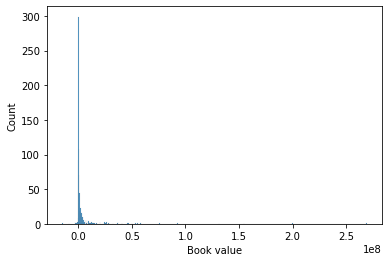

In [16]:
# Mostramos un histograma para ver la frecuencia del Book value 
sb.histplot(us2022_quarter['Book value'])

In [17]:
# Imprimimos valores descriptivos para tener una mejor perspectiva de los datos del histograma de Book value
print(us2022_quarter['Book value'].describe())

count    8.690000e+02
mean     3.477157e+06
std      1.524353e+07
min     -1.479100e+07
25%      1.012760e+05
50%      4.235880e+05
75%      1.746849e+06
max      2.691180e+08
Name: Book value, dtype: float64


In [18]:
# Mostramos el gráfico para revisar los datos de Book value de cada industria y podemos darnos cuenta que los datos del Book value estan por encima de lo que se observa en el histograma
px.bar(us2022_quarter, x = 'Sector\nEconomatica', y = 'Book value', title = "Book values por industria")

In [19]:
# Mostramos un histograma para ver la frecuencia del Market value 
px.histogram(us2022_quarter['Market value'])

In [20]:
# Imprimimos valores descriptivos para tener una mejor perspectiva de los datos del histograma de Market value
print(us2022_quarter['Market value'].describe())

count    8.990000e+02
mean     1.221618e+07
std      8.595164e+07
min      3.490000e+01
25%      1.694179e+05
50%      9.956875e+05
75%      4.471550e+06
max      2.212838e+09
Name: Market value, dtype: float64


In [21]:
# Mostramos el gráfico para revisar los datos de Market value de cada industria y podemos darnos cuenta que los datos del Market value son más dispersos que los del Book value
px.bar(us2022_quarter, x = 'Sector\nEconomatica', y = 'Market value', title = "Market values por industria")

* For each industry (and for all industries), what can you say about profit margin of firms? show a) descriptive statistics of profit margin and b) plot(s) to illustrate how profit margin changes across industries.

In [22]:
px.box(us2022_quarter, x = 'Sector NAICS\nlevel 1', y= 'Profit margin', title = "Profit margin por industria")

* Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

In [23]:
# Obtenemos las 10 mayores firms de US en terminos del Market value 
us10_firms_markValue = us2022_quarter.sort_values("Market value", ascending = False).head(10)

In [24]:
us10_firms_markValue

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind,Book value,Market value,Operating profit,Operating profit margin,Net Income,Profit margin
809,AAPL,2022q2,82959000.0,47074000.0,12809000.0,0.0,-10000.0,0.0,3624000.0,3.363090e+08,...,NASDAQ,Electric Electron,Computer and Peripheral Equipment Manufacturing,6.056,58107000.0,2.212838e+09,23076000.0,0.278162,19452000.0,0.234477
18173,AMZN,2022q2,121234000.0,66424000.0,51403000.0,90000.0,-5557000.0,425000.0,-637000.0,4.197280e+08,...,NASDAQ,Trade,Electronic Shopping and Mail-Order Houses,3.768,131402000.0,1.080624e+09,3317000.0,0.027360,3529000.0,0.029109
78332,CVX,2022q2,68762000.0,46321000.0,4563000.0,1759000.0,-80000.0,129000.0,4288000.0,2.579360e+08,...,NYSE,Oil & Gas,Petroleum and Coal Products Manufacturing,0.566,154562000.0,2.833974e+08,16119000.0,0.234417,11702000.0,0.170181
1079,ABBV,2022q2,14583000.0,4170000.0,7290000.0,-172000.0,-1584000.0,532000.0,255000.0,1.431860e+08,...,NYSE,Chemical,Pharmaceutical and Medicine Manufacturing,0.500,14688000.0,2.706506e+08,3295000.0,0.225948,2508000.0,0.171981
34013,BAC,2022q2,14975000.0,2531000.0,0.0,0.0,-5552000.0,0.0,645000.0,3.111606e+09,...,NYSE,Finance and Insurance,Depository Credit Intermediation,0.914,269118000.0,2.508107e+08,12444000.0,0.830985,11799000.0,0.787913
68882,COST,2022q2,52596000.0,46355000.0,4450000.0,0.0,-19000.0,-36000.0,455000.0,6.385200e+07,...,NASDAQ,Trade,Other General Merchandise Stores,0.553,20513000.0,2.123033e+08,1791000.0,0.034052,1372000.0,0.026086
2063,ABT,2022q2,11257000.0,4933000.0,3948000.0,0.0,82000.0,106000.0,334000.0,7.420200e+07,...,NYSE,Chemical,Pharmaceutical and Medicine Manufacturing,0.583,36716000.0,1.902700e+08,2376000.0,0.211069,1936000.0,0.171982
73022,CSCO,2022q2,12835000.0,4714000.0,4511000.0,0.0,166000.0,-25000.0,757000.0,9.279700e+07,...,NASDAQ,Electric Electron,Communications Equipment Manufacturing,0.602,40400000.0,1.765707e+08,3610000.0,0.281262,2878000.0,0.224231
64170,CMCSA,2022q2,30016000.0,20181000.0,3468000.0,0.0,-742000.0,968000.0,1261000.0,2.670320e+08,...,NASDAQ,Other,Cable and Other Subscription Programming,0.644,92559000.0,1.731755e+08,6367000.0,0.212120,4138000.0,0.137860
4583,ADBE,2022q2,4386000.0,539000.0,2318000.0,0.0,-9000.0,28000.0,314000.0,2.632600e+07,...,NASDAQ,Software & Data,Software Publishers,0.795,13985000.0,1.713161e+08,1529000.0,0.348609,1187000.0,0.270634


* Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?

In [25]:
# Obtenemos las 10 mayores firms de US en terminos del Book value 
us10_firms_bookValue = us2022_quarter.sort_values("Book value", ascending = False).head(10)

In [26]:
us10_firms_bookValue

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,Exchange / Src,Sector\nEconomatica,Sector NAICS\nlast available,partind,Book value,Market value,Operating profit,Operating profit margin,Net Income,Profit margin
34013,BAC,2022q2,14975000.0,2531000.0,0.0,0.0,-5552000.0,0.0,645000.0,3.111606e+09,...,NYSE,Finance and Insurance,Depository Credit Intermediation,0.914,269118000.0,2.508107e+08,12444000.0,0.830985,11799000.0,0.787913
49680,C,2022q2,15630000.0,3666000.0,0.0,0.0,-6235000.0,0.0,1182000.0,2.380904e+09,...,NYSE,Finance and Insurance,Depository Credit Intermediation,0.375,199626000.0,8.906928e+07,11964000.0,0.765451,10782000.0,0.689827
78332,CVX,2022q2,68762000.0,46321000.0,4563000.0,1759000.0,-80000.0,129000.0,4288000.0,2.579360e+08,...,NYSE,Oil & Gas,Petroleum and Coal Products Manufacturing,0.566,154562000.0,2.833974e+08,16119000.0,0.234417,11702000.0,0.170181
18173,AMZN,2022q2,121234000.0,66424000.0,51403000.0,90000.0,-5557000.0,425000.0,-637000.0,4.197280e+08,...,NASDAQ,Trade,Electronic Shopping and Mail-Order Houses,3.768,131402000.0,1.080624e+09,3317000.0,0.027360,3529000.0,0.029109
64170,CMCSA,2022q2,30016000.0,20181000.0,3468000.0,0.0,-742000.0,968000.0,1261000.0,2.670320e+08,...,NASDAQ,Other,Cable and Other Subscription Programming,0.644,92559000.0,1.731755e+08,6367000.0,0.212120,4138000.0,0.137860
78062,CVS,2022q2,80636000.0,76067000.0,0.0,0.0,33000.0,583000.0,1068000.0,2.302790e+08,...,NYSE,Trade,Health and Personal Care Stores,0.300,75506000.0,1.215059e+08,4569000.0,0.056662,2918000.0,0.036187
71492,CRM,2022q2,7411000.0,2045000.0,5346000.0,0.0,-49000.0,0.0,-57000.0,9.302200e+07,...,NYSE,Software & Data,Software Publishers,0.737,58876000.0,1.642148e+08,20000.0,0.002699,77000.0,0.010390
809,AAPL,2022q2,82959000.0,47074000.0,12809000.0,0.0,-10000.0,0.0,3624000.0,3.363090e+08,...,NASDAQ,Electric Electron,Computer and Peripheral Equipment Manufacturing,6.056,58107000.0,2.212838e+09,23076000.0,0.278162,19452000.0,0.234477
15473,AMD,2022q2,6550000.0,3522000.0,2508000.0,-6000.0,0.0,25000.0,54000.0,6.750200e+07,...,NASDAQ,Electric Electron,Semiconductor and Other Electronic Component M...,0.377,55169000.0,1.239202e+08,526000.0,0.080305,447000.0,0.068244
67230,COF,2022q2,7095000.0,578000.0,0.0,0.0,-3953000.0,0.0,533000.0,4.402880e+08,...,NYSE,Finance and Insurance,Depository Credit Intermediation,0.194,53410000.0,3.998997e+07,6517000.0,0.918534,5984000.0,0.843411


### 2.2.1.2 Considering the whole history of financial data for all firms:

* How can you measure firm profitability that can be used to compare performance among firms of different sizes? Select and justify at least 3 measures and show descriptive statistics

In [27]:
us2022_merged.corr()['totalassets']

revenue                    0.333495
cogs                       0.179930
sgae                       0.209718
otheropexp                 0.037647
extraincome               -0.682078
finexp                     0.061794
incometax                  0.234134
totalassets                1.000000
totalliabilities           0.998120
shortdebt                  0.342227
longdebt                   0.898848
stockholderequity          0.884258
adjprice                  -0.002741
originalprice              0.046352
sharesoutstanding          0.646396
fiscalmonth               -0.000798
year                      -0.032821
cto                       -0.000816
N                          0.012467
Book value                 0.884259
Market value               0.315519
Operating profit           0.677114
Operating profit margin    0.004278
Net Income                 0.701521
Profit margin              0.004407
Name: totalassets, dtype: float64

In [28]:
# Para obtener el rendimiento entre firms podemos obtener el dato con una función de correlación
us2022_merged.corr()['Operating profit']

revenue                    0.590156
cogs                       0.435373
sgae                       0.206746
otheropexp                 0.081137
extraincome               -0.458654
finexp                     0.136946
incometax                  0.568639
totalassets                0.677114
totalliabilities           0.655998
shortdebt                  0.183939
longdebt                   0.664445
stockholderequity          0.750023
adjprice                  -0.003311
originalprice              0.134275
sharesoutstanding          0.652116
fiscalmonth               -0.009582
year                      -0.034102
cto                       -0.003799
N                         -0.003575
Book value                 0.750018
Market value               0.658490
Operating profit           1.000000
Operating profit margin    0.006105
Net Income                 0.951768
Profit margin              0.006232
Name: Operating profit, dtype: float64

In [29]:
# Aqui podemos observar que el revenue tiene una mejor correlación 
us2022_merged.corr()['revenue']

revenue                    1.000000
cogs                       0.914765
sgae                       0.582169
otheropexp                 0.328325
extraincome               -0.080037
finexp                     0.329195
incometax                  0.441100
totalassets                0.333495
totalliabilities           0.297745
shortdebt                  0.173205
longdebt                   0.372473
stockholderequity          0.562425
adjprice                  -0.005063
originalprice              0.288482
sharesoutstanding          0.434002
fiscalmonth               -0.001056
year                      -0.046721
cto                        0.002773
N                         -0.009127
Book value                 0.562421
Market value               0.688222
Operating profit           0.590156
Operating profit margin    0.007746
Net Income                 0.506595
Profit margin              0.007998
Name: revenue, dtype: float64

* Calculate and explain earnings per share deflated by price.

In [30]:
# Obtenemos las earnings per share 
earnings_per_share = us2022_quarter["revenue"]
earnings_per_share.sort_values( ascending = True )

58320   -252794.0
36263         0.0
36353         0.0
37613         0.0
70772         0.0
           ...   
68972         NaN
73562         NaN
74552         NaN
74912         NaN
78152         NaN
Name: revenue, Length: 910, dtype: float64

In [31]:
earnings_per_share

89        1607000.0
179       3644000.0
269         10900.0
359      13422000.0
449         44669.0
            ...    
81392      830543.0
81482      289409.0
81572           0.0
81662      572700.0
81752      853200.0
Name: revenue, Length: 910, dtype: float64

### 2.2.2 About statistical modeling

* You have to select a group of firms according to their general industry classification:

* Using your subset of firms that belong to your industry, which factors (variables) might be related to annual stock return one quarter in the future? Select at least 3 factors and briefly explain why you think might be related to stock returns.

* Design and run a multiple regression model to examine whether your selected factors and earnings per share deflated by price can explain/predict annual stock returns. You have to control for industry and firm size. To control for these variables you have to include them as extra independent variables in the model

* Interpret your model

* Adjustments to your model. If there is one or more independent variables (factors or control variables) that were not significant, drop them from your model. You have to run and interpret your final model.